<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Copy_of_TRAIN_YLC_Week_6_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 6: Linear Regression Part I**
---

### **Description**
In this homework, you will continue honing your sklearn and linear regression skills.

</br>

### **Lab Structure**
**Part 1**: [California Housing Dataset](#p1)

**Part 2**: [CO2 Emissions Dataset](#p2)

</br>

### **Goals**
 By the end of this homework, you will:
1. Recognize what sklearn is and why we're using it.
2. Recognize how to implement Linear Regression models with sklearn.

</br>

### **Cheat Sheets**
* [Linear Regression with sklearn](https://docs.google.com/document/d/18NpkZHfcdrFd6IKBlZduMk_AWZiHgB3YsN7mLofTq-M/edit?usp=drive_link)

<br>

**Run the cell below to import the necessary libraries and functions.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a name="p1"></a>

---
## **Part 1: California Housing Dataset**
---

#### **About the Dataset**
The price of a home in California is nearly double the national average. The California Housing Dataset is a collection of data containing information on the median house value and other features of census block groups in California. This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The features are as follows:
* `MedInc`: median income in block group (in hundreds of thousands of dollars, i.e. \$100,000)
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longtitude`: block group longitude
* `TARGET`: median house value for California districts (in hundreds of thousands of dollars, i.e. $100,000)

#### **Your Task**
Using the California Housing dataset, you will be able to predict the median house value for a specific home.

As you build your model, try using different features for your model and see how the accuracy changes.


#### **Step #1: Load the data**


In [ ]:
#import relevant packages
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1
cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target

#### **Step #2: Decide independent and dependent variables**

Let's choose the following features:
* `HouseAge`
* `AveBedrms`
* `Latitude`
* `Longitude`

<br>

And the following label: `TARGET`.

In [ ]:
features = df[['HouseAge', 'AveBedrms', 'Latitude', 'Longitude']]

In [ ]:
labels = df['TARGET']

#### **Steps #3-6: Split data, import/initialize your model, fit the model, make a prediction, and create a visualization**

In [ ]:
# 3
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# 4 - 6
LR2 = LinearRegression()
LR2.fit(X_train, y_train)
y_pred = LR2.predict(X_test)

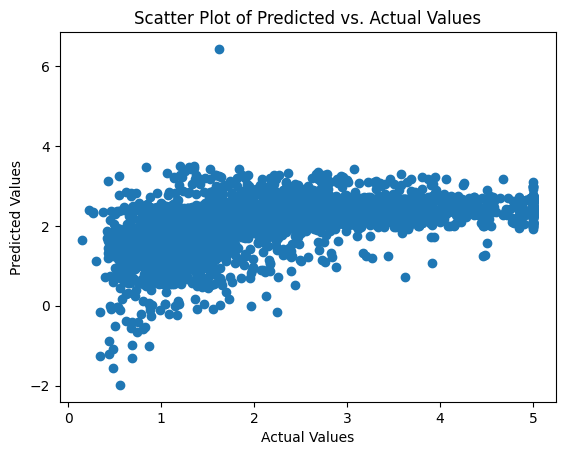

In [ ]:
# 6 part two: visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()



#### **Step #8: Use the model**

Use the model to predict the median house value for a home that is 51 years old, has an average of 7.2 bedrooms, and is at 38.1 latitude and -121.08 longitude.


<br>

**NOTE**: We are skipping Step #7, which we'll learn more about next week.

In [ ]:
prediction = LR2.predict(pd.DataFrame([[51, 7.2, 38.1, -121.08]],
                         columns=['HouseAge',	'AveBedrms','Latitude',	'Longitude']))

prediction

array([2.53794112])

<a name="p2"></a>

---
## **Part 2: CO2 Emissions Dataset**
---

#### **About the Dataset**
Since 1970, CO2 emissions have increased by nearly 90%. These elevated CO2 levels cause poor air quality and contribute to climate change. Globally, cars and other transportation vehicles are responsible for about 29% of overall CO2 emissions. This CO2 emissions dataset is a collection of data from cars that contains information on the car's make, model, volume, weight, and how much CO2 it emits.

The features are as follows:
* `Car`: name of car brand
* `Model`: name of car model
* `Volume`: engine size (in cm^3)
* `Weight`: weight of car (in kg)
* `CO2`: amount of CO2 emitted (in g/km)

#### **Your Task**
Using the CO2 Emissions dataset, you will do the following:
* Build a model that will predict the CO2 emissions of a car;
* Predict the CO2 emissions of a car with a specific volume and weight.


#### **Step #1: Load the data**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/emissions/car_emissions.csv"
cars_df = pd.read_csv(url)
cars_df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


#### **Step #2: Decide independent and dependent variables**

We are going to use `Volume` and `Weight` as our independent variables for predicting `CO2` emissions.



In [ ]:
features = cars_df[['Volume', 'Weight']]
labels = cars_df['CO2']

#### **Step #3: Split data into training and testing data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### **Step #4: Import your algorithm**


In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**

Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model, test on the testing data**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### **Step #8: Use the model**

Using the model we created, predict the CO2 emissions of two cars:

* **Car 1:** Volume is 800 cm^3 and weight is 1020 kg

* **Car 2:**  Volume is 1020 cm^3 and weight is 800 kg

<br>

**NOTE**: You must create a dataframe containing with the information of the new cars:

```python
new_car_data = pd.DataFrame(new_car_data_here, columns = ["Volume", "Weight"])
```

In [ ]:
new_cars_data = pd.DataFrame({
    'Volume': [800, 1020],
    'Weight': [800, 800]
})
predicted_CO2 = model.predict(new_cars_data)
new_cars_data['Predicted_CO2'] = predicted_CO2
new_cars_data

,Volume,Weight,Predicted_CO2
0,800,800,94.084375
1,1020,800,95.027606


---
#End of Notebook

© 2023 The Coding School, All rights reserved